# Notebook de démonstration du fonctionnement du package workforce_scheduling

## Installation des dépendances

On vous propose d'installer les dépendances du package à partir de la cellule suivante si ce n'est toujours pas fait.

In [1]:
! pip install ..

Processing /Users/gorceixantoine/Desktop/workforce_scheduling
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for workforce-scheduling: filename=workforce_scheduling-0.1.0-py3-none-any.whl size=17012 sha256=b698ec31460d6233f912a2e2a3154c9a5062cf7a0a073256fd495aba73e9ca02
  Stored in directory: /private/var/folders/yy/nk3ftmr5559gmlcky86sgvh40000gn/T/pip-ephem-wheel-cache-3caubov4/wheels/fc/ff/d6/70f4a7e0edb42d7613a09504a54a38d5df9f27e55932f1092f
Successfully built workforce-scheduling
  Attempting uninstall: workforce-scheduling
    Found existing installation: workforce-scheduling 0.1.0
    Uninstalling workforce-scheduling-0.1.0:
      Successfully uninstalled workforce-scheduling-0.1.0


## Quelques imports utiles

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from workforce_scheduling.utils import get_schedule_from_npz
from workforce_scheduling.plot import plot_pareto_surface, plot_schedule
from workforce_scheduling.preferences.uta import run_uta
from workforce_scheduling.preferences.minmax_ranking import run_kbest

## Résolution sur des instances

On propose de déterminer les solutions non-dominées sur deux instances :
- l'instance du fichier `example/data_example/medium_instance.json`
- une instance générée par le script `./scripts/generate_instances.py` accessible depuis `example/data_example/instances_16/instance_0.json`

La cellule suivante recherche les solutions non-dominées pour ces deux instances. La cellule prend un certain temps à s'exécuter (de l'ordre de 1 à 2 heures). 

Les solutions ont été précalculées et sont disponibles dans les fichiers `example/solved_example/instances_16/instance_0/instance_0_pareto.csv` et `example/solved_example/medium_instance/medium_instance_pareto.csv`.

In [ ]:
! python -m workforce_scheduling solve --data-path=./data_example/medium_instance.json
! python -m workforce_scheduling solve --data-path=./data_example/instances_16/instance_0.json

## Visualisation de solutions

### Surfaces de Pareto

Surface de Pareto de l'instance `medium.json`.

In [ ]:
medium_pareto_df = pd.read_csv(Path("./solved_example/medium_instance/medium_instance_pareto.csv"))
plot_pareto_surface(medium_pareto_df)

Surface de Pareto de l'instance `instance_0.json`

In [ ]:
generated_pareto_df = pd.read_csv(Path("./solved_example/instances_16/instance_0/instance_0_pareto.csv"))
plot_pareto_surface(generated_pareto_df)

### Exemples d'emplois du temps

La cellule suivante affiche un emploi du temps possible pour l'instance `medium_instance.json`. Pour cette solution, le profit est de 411, le nombre maximal de projets par employé est de 6 et la durée du plus long projet s'élève à 10 jours.

In [ ]:
medium_schedule = get_schedule_from_npz(Path("./solved_example/medium_instance/workforce_scheduling34761.npz"))
plot_schedule(medium_schedule)

La cellule d'après montre un emploi du temps possible pour l'instance générée `instance_0.json`. Pour ce planning, le profit est de 427, le nombre maximal de projets par employé est de 6 et la durée du projet le plus long est de 4 jours.

In [ ]:
generated_schedule = get_schedule_from_npz(Path("./solved_example/instances_16/instance_0/workforce_scheduling72229.npz"))
plot_schedule(generated_schedule)

## Méthodes de préférences :

## UTA

In [3]:
# On classifie nos instances selon les deux méthodes présentées dans le rapport :
path1 = Path("./solved_example/medium_instance/medium_instance_pareto.csv")
path2 = Path("./solved_example/medium_instance/preorder_medium_instance.csv")
selection= run_uta(path1,path2)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-30
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 21 rows, 25 columns and 96 nonzeros
Model fingerprint: 0x0fe511da
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve removed 11 rows and 9 columns
Presolve time: 0.03s
Presolved: 10 rows, 19 columns, 45 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.224146e+00   0.000000e+00      0s
       5    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.03 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Inte

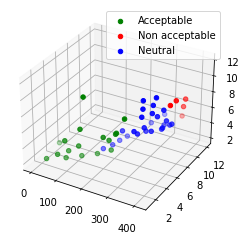

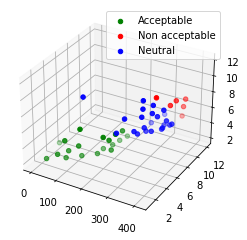

In [6]:
# On affiche en 3D la répartition des classes :
from workforce_scheduling.plot import plot_classification
path3 = Path("./solved_example/medium_instance/Classification_instances_coeff_appris.csv")
path4 = Path("./solved_example/medium_instance/Classification_instances.csv")
medium_classification_df_learnt = pd.read_csv(path3)
medium_classification_df= pd.read_csv(path4)
plot_classification(medium_classification_df)
plot_classification(medium_classification_df_learnt)